In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USA_Housing.csv')

In [4]:
# spliting data into dependent and independent variables i.e. training and testing data 

# We need dependent and independent variable seperation always on any project to do the train test split ok!!!!!

x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data.Price

In [5]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101) #25% is test and 75% is training

In [11]:
# features scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 0.34529318, -0.84306952,  0.57820121, -0.37429069, -1.75053875],
       [-0.18466794, -0.276508  , -0.07456069, -0.45561391, -0.82511745],
       [ 0.92874457, -1.77295774,  0.48319053,  1.08139504,  0.62832369],
       ...,
       [-1.20951742, -2.28499865, -0.11524894, -1.35016939,  2.72022392],
       [-0.50924621, -0.03693705, -1.07263584,  0.11364866, -0.34921044],
       [ 0.62611608,  1.710467  ,  1.46138542,  0.30069208,  2.01117877]])

In [14]:
X_test = sc.transform(X_test) # transform and fit_transform 
X_test

array([[-0.20623796, -0.26965523,  0.770336  ,  0.22125872,  0.07119915],
       [-0.63064284, -1.03852408,  0.41364962,  1.74755766, -1.01469968],
       [ 0.42874003,  0.75018826,  1.29622531, -0.56599021,  0.71213765],
       ...,
       [-1.17783633, -0.15182579,  0.86635372, -0.67845434,  0.44429838],
       [-0.45871121, -1.37287666, -1.09257749,  0.04452937, -0.31641495],
       [ 0.14002691,  0.6155753 , -0.82946447,  0.34978916,  1.56701997]])

In [17]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coeficient:',lm.coef_)

Coeficient: [229351.07160252 161315.32652344 120974.10877093   2231.32988299
 151328.44980526]


In [22]:
y_pred = lm.predict(X_train)

In [24]:
# coeficient of determination r2_score lies betwwen 0 and 1 closer to 1 more accurate prediction 
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.9182890812981098


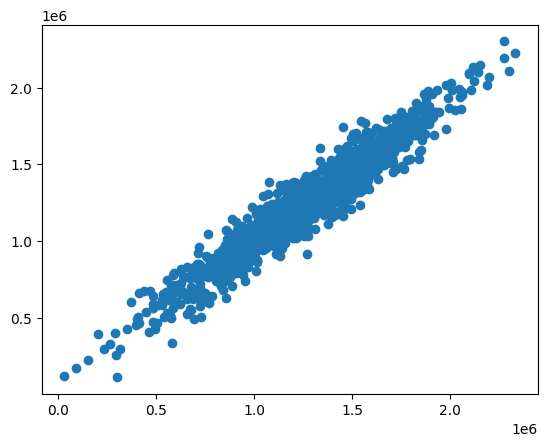

In [25]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

C:\Users\yogesh\AppData\Local\Temp\ipykernel_18040\1714093312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)
C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Axes: xlabel='Price', ylabel='Density'>

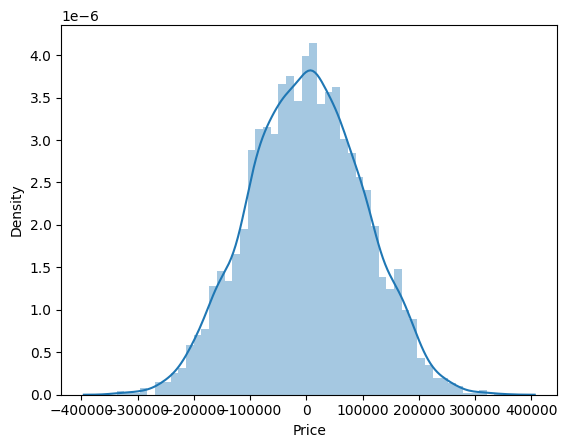

In [27]:
sns.distplot((y_train-y_pred),bins=50)